## KNN Classifier

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

### We have used pickle file here instead of csv because, we changed data types of some variables in part 1 of the project and since data is stored in text format in csv file, it can't store data types. So, we decided to use pickle file of our data to get appropriate data type of variables 

In [3]:
#loading the dataset

df = pd.read_pickle('Group_1_data_cleaned.pkl')

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [5]:
# converting categorical variable into dummies

df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [7]:
# defining target variable

X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [8]:
#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Columns: 137 entries, duration to is_guest_login_1.0
dtypes: category(1), float64(21), int64(6), uint8(109)
memory usage: 87.5 MB


## Training base model of KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Implementing KNN model

model = KNeighborsClassifier()
model.fit(X_train, y_train)

C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [30]:
#accuracy of the model

accuracy_score(y_test, y_pred)

0.9753870352300366

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11477,  1376],
       [  314, 55496]], dtype=int64)

sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['duration','protocol_type'service	flag	src_bytes	dst_bytes	land	wrong_fragment	urgent	...	dst_host_srv_count	dst_host_same_srv_rate	dst_host_diff_srv_rate	dst_host_same_src_port_rate	dst_host_srv_diff_host_rate	dst_host_serror_rate	dst_host_srv_serror_rate	dst_host_rerror_rate	dst_host_srv_rerror_rate],
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     12853
           1       0.98      0.99      0.99     55810

    accuracy                           0.98     68663
   macro avg       0.97      0.94      0.96     68663
weighted avg       0.98      0.98      0.97     68663



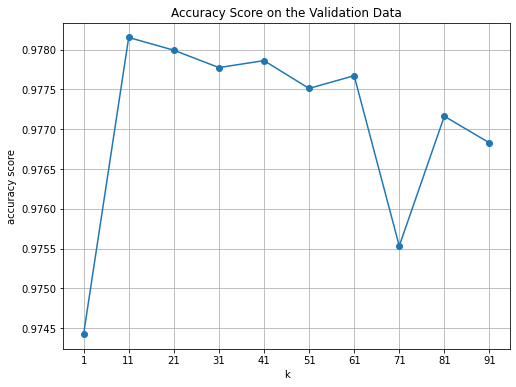

In [34]:
#visualizing the accuracy with different values of K

import warnings
warnings.filterwarnings("ignore")

k_values = []
acc_score = []

for k in range(1, 100, 10):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [35]:
#maximum accuracy
m = max(acc_score)
m

0.9781541732810975

In [36]:
#k value with max accuracy
k_values[acc_score.index(m)]

11

In [17]:
#training model with above k value
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9775424901329682

In [38]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [39]:
X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [40]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

array([0.97706199, 0.9742706 , 0.97376023, 0.97516809, 0.97650314])

[0.98 0.97 0.97 0.98 0.98]
Average accuracy: 0.9753528104833412
Accuracy standard deviation: 0.0012638202652849886


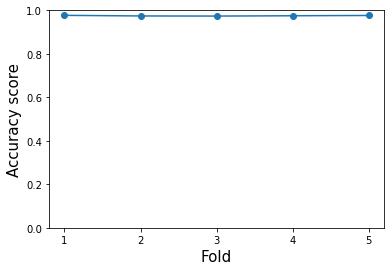

In [41]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

## Hyperparameter tuning with Gridsearch CV
## Modelling data using Linear KNN and Best Hyperparameter

In [10]:
from sklearn.model_selection import GridSearchCV


model = KNeighborsClassifier()

parameters = {"n_neighbors": range(2, 100,10),
              "weights": ["uniform", "distance"]}

gridsearch_knnreg = GridSearchCV(KNeighborsClassifier(), parameters, cv=3)
gridsearch_knnreg.fit(X_train, y_train)

C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 100, 10),
                         'weights': ['uniform', 'distance']})

In [14]:
#prediction

y_pred = gridsearch_knnreg.predict(X_test)
y_pred

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13041
           1       0.99      0.99      0.99     55622

    accuracy                           0.98     68663
   macro avg       0.97      0.97      0.97     68663
weighted avg       0.98      0.98      0.98     68663



In [15]:
#accuracy of the model

print(accuracy_score(y_test, y_pred))

0.9785765259309963


In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12305,   736],
       [  735, 54887]], dtype=int64)

In [18]:
#best parameters from gridsearchCV
gridsearch_knnreg.best_params_

{'n_neighbors': 32, 'weights': 'distance'}